Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with::

In [ ]:
COLLABORATORS = ""

---

In [ ]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length or less (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [15 pts]

In 2-4 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 

In this project, I will try to simulate the behavior of a common neuron, which has sodium and potassium channels, using the classical Hodgkin-Huxley model. 

The Hodgkin–Huxley model, or conductance-based model, is a mathematical model that describes how action potentials in neurons are initiated and propagated. It is a set of nonlinear differential equations that approximates the electrical characteristics of excitable cells such as neurons and cardiac myocytes. It is a continuous-time dynamical system.

Alan Hodgkin and Andrew Huxley described the model in 1952 to explain the ionic mechanisms underlying the initiation and propagation of action potentials in the squid giant axon. They received the 1963 Nobel Prize in Physiology or Medicine for this work.

The model can be described as a set of ODEs. The current per unit area $I$ can be represent as
$$I=I_c+I_K+I_{Na}+I_l$$
where 
$$I_c=C_m \frac{dV_m}{dt}$$
is the current flowing through the lipid bilayer. $C_m$ is a constant which stands for capacitance. $V_m$ is the membrane potential.
$$I_K=g_Kn^4(V_m-V_k)$$
is the current flowing through the potassium channel. $V_k$ is a constant and represents Potassium reversal potentials. $g_K$ is also a constant and depicts the conductance. n is a non-linear function that changes with time t and V_m describes activation of the channel. Similarly, 
$$I_{Na}=g_{Na}m^3h(V_m-V_{Na})$$
m and h are non-linear functions that change with time t and V_m describes activation and inactivation of the sodium channel.
$$I_l=g_{l}(V_m-V_{l})$$
is the leaking current.

n, m, h are given by
$${\frac {dn}{dt}}=\alpha _{n}(V_{m})(1-n)-\beta _{n}(V_{m})n$$
$${\frac {dm}{dt}}=\alpha _{m}(V_{m})(1-m)-\beta _{m}(V_{m})m$$
$${\frac {dh}{dt}}=\alpha _{h}(V_{m})(1-h)-\beta _{h}(V_{m})h$$
where $\alpha _{i}$ and $\beta _{i}$ are functions of $V_m$

My goal is to build the model and to simulate firing threshold and spike train, and find the resting potential and firing threshhold.

## Problem Description [15 pts]

In 2-4 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 

The Hodgkin-Huxley model is one of the most important model in neuroscience. I personally have great interest in theoretical neuroscience, and this is the first computational model I learned by myself. Therefore, I think this is a good place for me to practice. 

For more general purpose, the H-H model describes the dynamics of electical activities of a neuron. By changing parameters in the system, people are able to simulate various types of neuron in different chemcial evironment. This is meaningful for us to understand celluar level behaviour, and it gives us hints about how bigger scale neural system works.

## Computational  Methods [10 pts]

Briefly describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain how the methods work, but you should briefly justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



I am going to use parameters provided in the book "Neuronal Dynamics From single neurons to networks and models of cognition" by Wulfram Gerstner, Werner M. Kistler, Richard Naud and Liam Paninski (https://neuronaldynamics.epfl.ch/online/Ch2.S2.html table 2.1). These parameters are experimental results on pyramidal neurons of the cortex. 

In a propagated model, $I=c{\frac {\partial ^{2}V}{\partial x^{2}}}$, but this will make the problem a PDE and sadly I do not know how to solve it. Therefore I am going to use $I=I_0$ for simplicity. To solve the system of ODEs ${n(V_m,t),m(V_m,t),h(V_m,t),V_m(t)}$, I first need to rewrite them in a solvable form.

$$
    \mathbf{u} = \begin{bmatrix} V_m \\ n \\ m \\ h\\ \end{bmatrix}, \quad 
    \mathbf{F}(t,\mathbf{u}) = \begin{bmatrix} -1/C_m(g_Kn^4(V_m-V_k)+g_{Na}m^3h(V_m-V_{Na})+g_{l}(V_m-V_{l})-I_0) \\ \alpha _{n}(V_{m})(1-n)-\beta _{n}(V_{m})n \\ \alpha _{m}(V_{m})(1-m)-\beta _{m}(V_{m})m \\ \alpha _{h}(V_{m})(1-h)-\beta _{h}(V_{m})h \\\end{bmatrix}
$$

Solve this system using scipy.integrate routine.
Since I cannot find the excat value of resting potential of this given neuron, I am going to use the convergence property of the system to test the implement. Also, I will use the similar approach to test the performance of RK45 and BDF on this problem. I finally choose BDF for this project by comparing relative errors in the test below.

In [ ]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first code block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code. 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.

YOUR ANSWER HERE

In [ ]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def parameters(Cm, gk, Vk, gna, Vna, gl, Vl, I0):
    #return a numpy array of parameters
    return numpy.array([Cm, gk, Vk, gna, Vna, gl, Vl, I0])

def F(t,u,parameters):
    #right hand side of ODEs
    dVm=-1./parameters[0]*(parameters[1]*u[1]**4*(u[0]-parameters[2])
                           +parameters[3]*u[2]**3*u[3]*(u[0]-parameters[4])
                           +parameters[5]*(u[0]-parameters[6])
                           -parameters[7])
    
    an=0.02*(u[0]-25.)/(1-numpy.exp(-(u[0]-25.)/9.))
    bn=-0.002*(u[0]-25.)/(1-numpy.exp((u[0]-25.)/9.))
    dn=an*(1-u[1])-bn*u[1]
    
    am=0.182*(u[0]+35.)/(1-numpy.exp(-(u[0]+35.)/9.))
    bm=-0.124*(u[0]+35.)/(1-numpy.exp((u[0]+35.)/9.))
    dm=am*(1-u[2])-bm*u[2]
    
    ah=0.25*numpy.exp(-(u[0]+90.)/12.)
    bh=0.25*numpy.exp((u[0]+62.)/6.)/numpy.exp((u[0]+90.)/12.)
    dh=ah*(1-u[3])-bh*u[3]
    return numpy.array([dVm, dn, dm, dh])

#parameters by Wulfram Gerstner et al.
Cm=1.
gk=35.
Vk=-77.
gna=40.
Vna=55
gl=0.3
Vl=-65.

In [ ]:
# testing block

#If implement correctly, V_m should converge to a rest potential when I=0 for all t with all different initial conditions



I0=0.
# 1st initial condition setting
u0test1=[-100.,0,0,0]
#2nd initial condition setting
u0test2=[0.,0,0,0]

f = lambda t, u: F(t, u, parameters(Cm, gk, Vk, gna, Vna, gl, Vl, I0))
t_span = (0., 500.)
t=numpy.linspace(0.,500.,10000)
sol_test1 = solve_ivp(f, t_span, u0test1,dense_output=True)
sol_test2 = solve_ivp(f, t_span, u0test2,dense_output=True)

print("test 1 resting potential: ", sol_test1.sol.__call__(t[-1])[0])
print("test 2 resting potential: ", sol_test2.sol.__call__(t[-1])[0])
numpy.testing.assert_allclose(sol_test1.sol.__call__(t[-1])[0], sol_test1.sol.__call__(t[-1])[0])
print('success!')

test 1 resting potential:  -63.054733942118034
test 2 resting potential:  -63.05452501919263
success!


In [ ]:
#compare RK45 and BDF
I0=0.
# 1st initial condition setting
u0test1=[-100.,0,0,0]
#2nd initial condition setting
u0test2=[0.,0,0,0]

f = lambda t, u: F(t, u, parameters(Cm, gk, Vk, gna, Vna, gl, Vl, I0))
t_span = (0., 5000.)
t=numpy.linspace(0.,5000.,10000)
sol_test1RK45 = solve_ivp(f, t_span, u0test1,method='RK45',dense_output=True)
sol_test2RK45 = solve_ivp(f, t_span, u0test2,method='RK45',dense_output=True)

sol_test1BDF = solve_ivp(f, t_span, u0test1,method='BDF',dense_output=True)
sol_test2BDF = solve_ivp(f, t_span, u0test2,method='BDF',dense_output=True)

print("test 1 resting potential with RK45: ", sol_test1RK45.sol.__call__(t[-1])[0])
print("test 1 resting potential with BDF: ", sol_test1BDF.sol.__call__(t[-1])[0])
print("test 2 resting potential with RK45: ", sol_test2RK45.sol.__call__(t[-1])[0])
print("test 2 resting potential with BDF: ", sol_test2BDF.sol.__call__(t[-1])[0])

print("relative error in RK45: ", numpy.abs((sol_test1RK45.sol.__call__(t[-1])[0]-sol_test2RK45.sol.__call__(t[-1])[0])/sol_test1RK45.sol.__call__(t[-1])[0]))
print("relative error in BDF: ", numpy.abs((sol_test1BDF.sol.__call__(t[-1])[0]-sol_test2BDF.sol.__call__(t[-1])[0])/sol_test1BDF.sol.__call__(t[-1])[0]))


test 1 resting potential with RK45:  -63.05428538630874
test 1 resting potential with BDF:  -63.05409460175619
test 2 resting potential with RK45:  -63.05439534746129
test 2 resting potential with BDF:  -63.05409422577831
relative error in RK45:  1.7439124378691397e-06
relative error in BDF:  5.9627830019279046e-09


BDF has a better performence in this test. Although it is not a proofed way to compare performences of algorithms, it at least shows that BDF converges better in this task. I am going to use BDF in the following implement. 

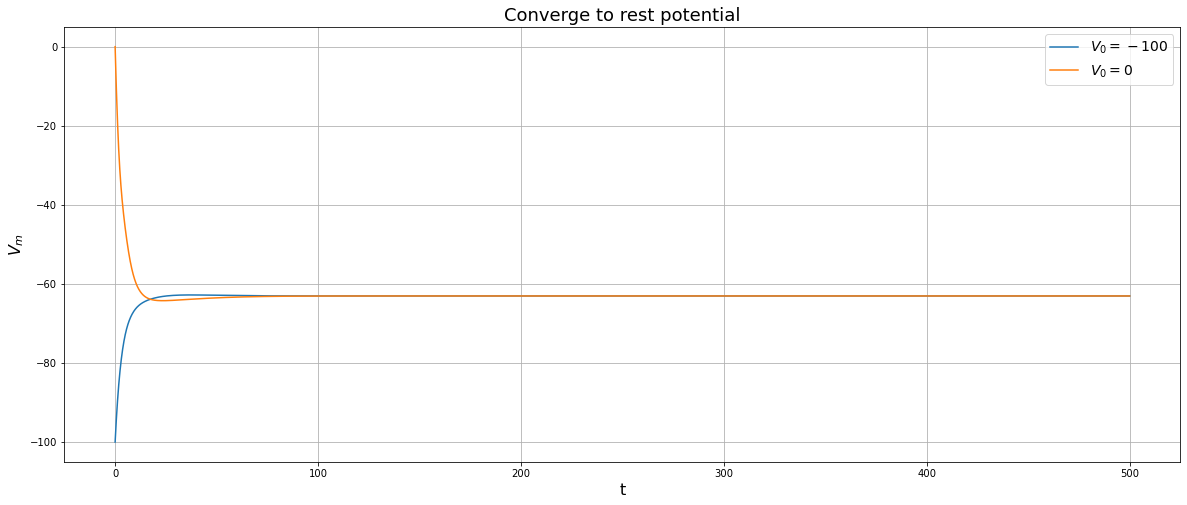

In [ ]:
t_span = (0., 500.)
t=numpy.linspace(0.,500.,10000)
I0=0.
u0=u0test1
f = lambda t, u: F(t, u, parameters(Cm, gk, Vk, gna, Vna, gl, Vl, I0))

sol_smooth = solve_ivp(f, t_span, u0, method='BDF',dense_output=True)
sol_smooth2 = solve_ivp(f, t_span, u0test2, method='BDF',dense_output=True)
fig = plt.figure(figsize=(20,8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, sol_smooth.sol.__call__(t)[0], label='$V_0=-100$')
axes.plot(t, sol_smooth2.sol.__call__(t)[0], label='$V_0=0$')
axes.set_title("Converge to rest potential", fontsize=18)
axes.set_xlabel("t", fontsize=16)
axes.set_ylabel("$V_m$", fontsize=16)
axes.legend(loc='best', fontsize=14)
axes.grid()


plt.show()

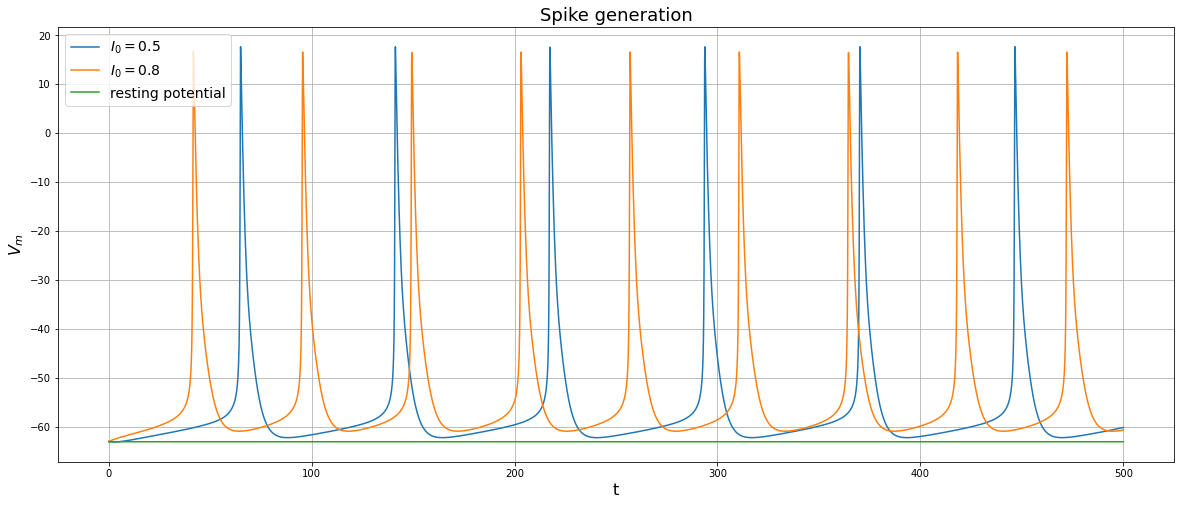

In [ ]:
I0=0.5
u0=[-63,0,0,0]
f = lambda t, u: F(t, u, parameters(Cm, gk, Vk, gna, Vna, gl, Vl, I0))

sol_smooth = solve_ivp(f, t_span, u0, method='BDF',dense_output=True)
fig = plt.figure(figsize=(20,8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, sol_smooth.sol.__call__(t)[0], label='$I_0=0.5$')

I0=0.8
u0=[-63,0,0,0]
f = lambda t, u: F(t, u, parameters(Cm, gk, Vk, gna, Vna, gl, Vl, I0))
sol_smooth = solve_ivp(f, t_span, u0, method='BDF',dense_output=True)
axes.plot(t, sol_smooth.sol.__call__(t)[0], label='$I_0=0.8$')
axes.plot(t, -63.05+0*t, label='resting potential')
axes.set_title("Spike generation", fontsize=18)
axes.set_xlabel("t", fontsize=16)
axes.set_ylabel("$V_m$", fontsize=16)
axes.legend(loc='best', fontsize=14)
axes.grid()


plt.show()

In the above figure, the model successfully shows the spike train. Also, it shows that the firing patterns are similiar in terms of shape with different input current as long as it is greater than the spike threshold, and greater input has greater frequency of firing.

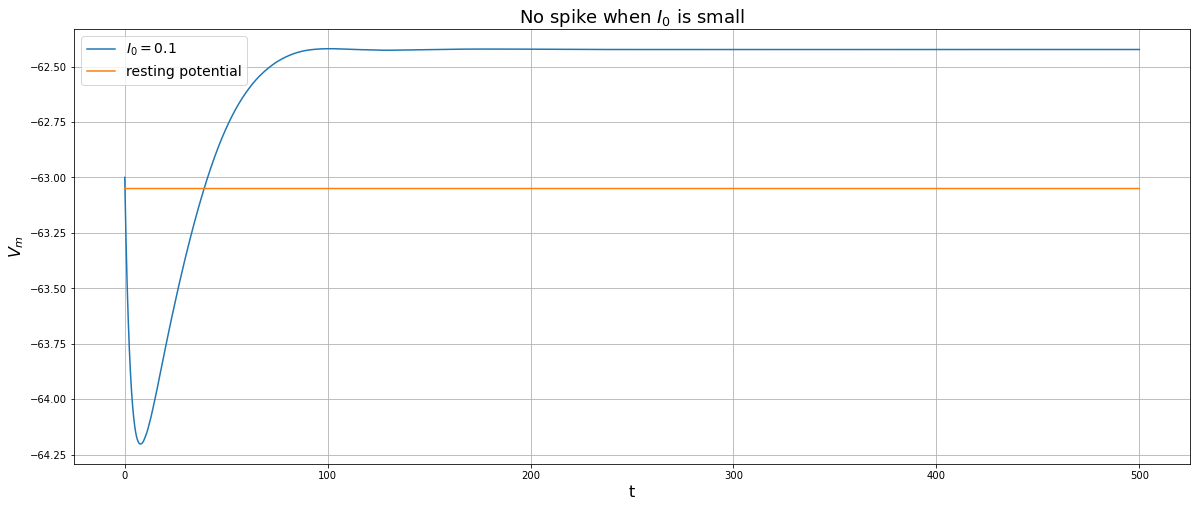

In [ ]:
I0=0.1
u0=[-63,0,0,0]
f = lambda t, u: F(t, u, parameters(Cm, gk, Vk, gna, Vna, gl, Vl, I0))

sol_smooth = solve_ivp(f, t_span, u0, method='BDF',dense_output=True)
fig = plt.figure(figsize=(20,8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, sol_smooth.sol.__call__(t)[0], label='$I_0=0.1$')
axes.plot(t, -63.05+0*t, label='resting potential')
axes.set_title("No spike when $I_0$ is small", fontsize=18)
axes.set_xlabel("t", fontsize=16)
axes.set_ylabel("$V_m$", fontsize=16)
axes.legend(loc='best', fontsize=14)
axes.grid()


plt.show()

In [ ]:
#finding the threshhold using brute force method

I_0=numpy.linspace(0.36,0.38,100)
u0=[-63,0,0,0]
t_span = (0., 500.)
t=numpy.linspace(0.,500.,100)
#the event finds if V_m ever reached 0. That is if it fires with given I_0
def event(t,f):
    return f[0]

for i in I_0:
    f = lambda t, u: F(t, u, parameters(Cm, gk, Vk, gna, Vna, gl, Vl, i))
    sol_smooth = solve_ivp(f, t_span, u0, dense_output=True,events=[event])
    if sol_smooth.t_events[0].size > 0:
        print("Threshhold I_0: ",i)
        break

Threshhold I_0:  0.37373737373737376


## Discussion [10 pts]

Discuss the results of your code including 
* Why do you believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


The model yields simulations that match experimental results (e.g. converge to the resting potential, spike train, threshhold), so I believe my results. The project worked in my opinion because it fulfilled its designed tasks. However, it cannot simulate the propagated action potential nor changing input I=I(t). Thus my next step is to solve the corresponding PDE system. Also, I feel there should exist a smarter way of finding the threshhold. 

The Hodgkin–Huxley model is regarded as one of the great achievements of 20th-century biophysics. Nevertheless, modern Hodgkin–Huxley-type models have been extended in several important ways:

*   Additional ion channel populations have been incorporated based on experimental data.
*   The Hodgkin–Huxley model has been modified to incorporate transition state theory and produce thermodynamic Hodgkin–Huxley models.
*   Models often incorporate highly complex geometries of dendrites and axons, often based on microscopy data.


